<a href="https://colab.research.google.com/github/AynaAraujo/Aprendendo_Redes_Neurais/blob/main/Introducao_Pytorch/Ativa%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funções de Ativação

O módulo ```nn```, que utilizamos para criar uma camada linear, também contém as principais funções de ativação. Então vamos primeiro importar o ```torch``` e o módulo ```nn``` <br>

In [ ]:
import torch
from torch import nn

Agora vamos retomar o exemplo do início desse capítulo, onde implementamos um modelo de classificação linear, definindo empiricamente os parâmetros adequados.
Como já fizemos essa parte passo a passo, podemos copiar o código do nosso script:<br>
Classificação-Linear.ipynb - https://colab.research.google.com/drive/14fL7OsRj4EGCnN2PjVUYFZievtGsq9ox

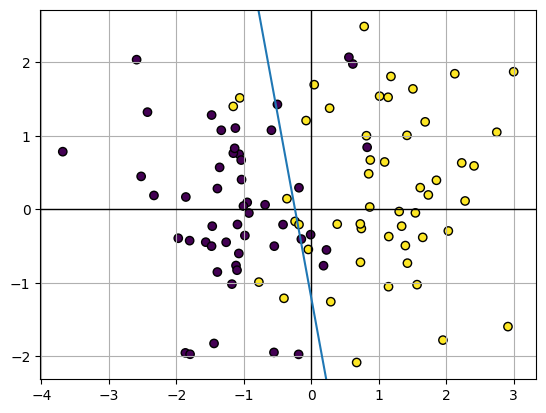

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)


X, Y = make_classification(
  n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1
)



def plotmodel(w1,w2,b):
  x = np.linspace(-2,4,50)
  y= -(w1*x +b)/w2

  plt.scatter(X[:,0], X[:,1], marker='o', c= Y, edgecolor= 'k')

  xmin, xmax =plt.gca().get_xlim()
  ymin, ymax =plt.gca().get_ylim()

  plt.axvline(0, -1,1, color='k', linewidth=1)
  plt.axhline(0, -2,4, color='k', linewidth=1)
  plt.plot(x,y)
  plt.grid(True)

  plt.xlim(xmin,xmax)
  plt.ylim(ymin,ymax)

w1 = 5 #a
w2 = 1  #b
b = 1.2   #c

plotmodel(w1,w2,b)



Agora vamos instanciar uma camada Linear análoga à nossa reta, ou seja:
* ```in_features  = 2``` : dimensionalidade da entrada
* ```out_features = 1``` : dimensionalidade da saída

Vamos instanciar também uma ativação sigmóide para compor o nosso modelo de classificação.
Documentação: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

Em seguida vamos substituir os pesos do perceptron com os parâmetros da nossa reta. Para isso criaremos um objeto ```Parameter```, o tipo de dado que camadas do PyTorch aceitam para representar os seus parâmetros. <br>
Documentação: https://pytorch.org/docs/stable/nn.html#torch.nn.Parameter


In [ ]:
perceptron = nn.Linear(2,1)
sigmoide = nn.Sigmoid() #Ativação Sigmoide


perceptron.weight = nn.Parameter(torch.Tensor([[w1,w2]]))
perceptron.bias = nn.Parameter(torch.Tensor([b]))

print(perceptron.weight.data)
print(perceptron.bias.data)


tensor([[5., 1.]])
tensor([1.2000])


Temos portanto:
* uma distribuição de pontos com duas classes linearmente separáveis
* um modelo linear de classificação binária, empiricamente definido, que inclui uma função de ativação sigmóide.

Agora vamos ver a diferença entre o resultado apresentado pelo perceptron antes e depois da função de ativação. Para isso, selecionei empiricamente alguns pontos da distribuiçã (índices 17, 21, 43 e 66) que nos ajudarão a entender o impacto da sigmóide.

In [ ]:
activation = nn.Tanh()
act_r = nn.ReLU()

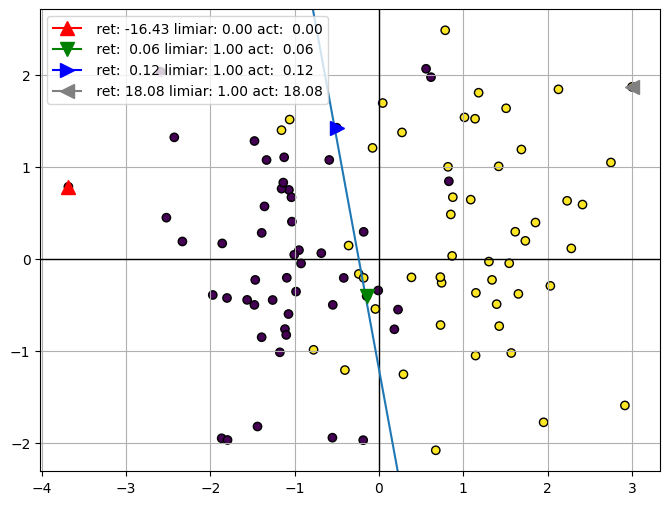

In [ ]:
markers = ['^','v','>','<']
colors = ['r','g','b','gray']
plt.figure(figsize=(8,6))

plotmodel(w1,w2,b)

for k, idx in enumerate([17,21,43,66]):
  x = torch.Tensor(X[idx])

  ret = perceptron(x) #var retorno
  #act_sigmoide = sigmoide(ret) #ativação
  #act_tg = activation(ret)
  act_Relu = act_r(ret)

  act = act_Relu
  act_limiar = 0 if ret.data < 0 else 1

  label = " ret: {:5.2f}".format(ret.data.numpy()[0]) + \
           " limiar: {:4.2f}".format(act_limiar) + \
           " act: {:5.2f}".format(act.data.numpy()[0])

  plt.plot(x[0],x[1],marker = markers[k], color = colors[k],markersize =10,label=label )

plt.legend()
plt.show()

Com a sigmoid, elementos na fronteira de decisão recebem o valor 0.5, indicando baixa certeza sobre a classe desses elementos. Quanto mais afasta da zona de confusão, maior a certeza da classificação (seja para 0, ou para 1).

Podemos experimentar diferentes funções de ativação e ver como elas nos ajudam a interpretar a saída do perceptron.